In [2]:
# TensorFlow and tf.keras
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import random

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

!ls "/content/drive/My Drive/Colab Notebooks"

Using TensorFlow backend.


Mounted at /content/drive
'Convolution Neural Net.ipynb'	 fashion  'Neural Network Tutorial.ipynb'


In [0]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    path = os.path.join("/content/drive/My Drive/Colab Notebooks/", path)
    
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 28 * 28)

    return images, labels

In [0]:
def blur(a, i):
  import numpy as np
  from scipy import ndimage
  pix_blur = (i,i)
  k = k = np.ones(pix_blur) / float(pix_blur[0]*pix_blur[1])
  return ndimage.convolve(a.reshape(28, 28), k, mode='mirror').reshape(28 * 28)

In [0]:
train_images, _, = load_mnist('fashion', kind='train')
test_images, _, = load_mnist('fashion', kind='t10k')
train_images, test_images, = train_images / 255.0, test_images / 255.0

# create labels for the train and test sets; normalized to 1 

train_labels = []
test_labels = []

for i in range(0, len(train_images)):
   j = random.randint(1, 5)
   train_images[i] = blur(train_images[i], j)
   train_labels.append(j / 5)

for i in range(0, len(test_images)):
   j = random.randint(1, 5)
   test_images[i] = blur(test_images[i], j)
   test_labels.append(j / 5)

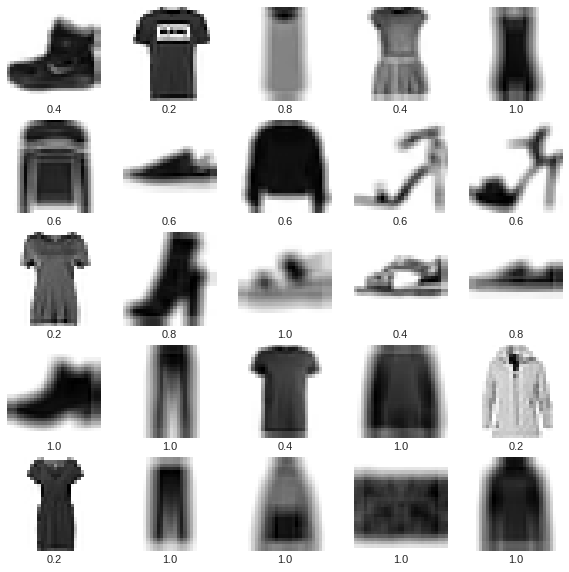

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

In [7]:
model = keras.Sequential([
    keras.layers.Dense(28 * 28, kernel_initializer='normal',input_dim = train_images.shape[1], activation='relu'),
    keras.layers.Dense(128, kernel_initializer='normal', activation=tf.nn.relu), # Layer that actually does stuff
    keras.layers.Dense(64, kernel_initializer='normal', activation=tf.nn.relu), # Layer that actually does stuff
    keras.layers.Dense(1, kernel_initializer='normal', activation='linear') # Output layer - probabilities for the 10 categories
])
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 724,241
Trainable params: 724,241
Non-trainable params: 0
_________________________________________________________________


In [0]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [9]:
# Training
model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)
#model.fit(train_images, train_labels, epochs=5)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
47904/48000 [============================>.] - ETA: 0s - loss: 0.1231 - mean_absolute_error: 0.1231
Epoch 00001: val_loss improved from inf to 0.08117, saving model to Weights-001--0.08117.hdf5
48000/48000 [==============================] - 23s 471us/step - loss: 0.1230 - mean_absolute_error: 0.1230 - val_loss: 0.0812 - val_mean_absolute_error: 0.0812
Epoch 2/5
47904/48000 [============================>.] - ETA: 0s - loss: 0.0697 - mean_absolute_error: 0.0697
Epoch 00002: val_loss improved from 0.08117 to 0.06020, saving model to Weights-002--0.06020.hdf5
48000/48000 [==============================] - 21s 444us/step - loss: 0.0696 - mean_absolute_error: 0.0696 - val_loss: 0.0602 - val_mean_absolute_error: 0.0602
Epoch 3/5
47936/48000 [============================>.] - ETA: 0s - loss: 0.0524 - mean_absolute_error: 0.0524
Epoch 00003: val_loss improved from 0.06020 to 0.04444, saving model to Weights-003--0.04444.hdf5
48000/4800

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

predictions = model.predict(test_images)
avg = np.mean([abs(p_i - e_i) / e_i for p_i, e_i in zip(predictions, test_labels)]) / len(predictions) * 100

print(avg)

10000/10000 [==============================] - 1s 76us/step
Test accuracy: 0.03074347393810749
0.0005805584788322449


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i].reshape(28, 28)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = predictions_array
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} ({})".format(predicted_label,
                                #100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  #thisplot[predicted_label].set_color('red')
  #thisplot[true_label].set_color('blue')

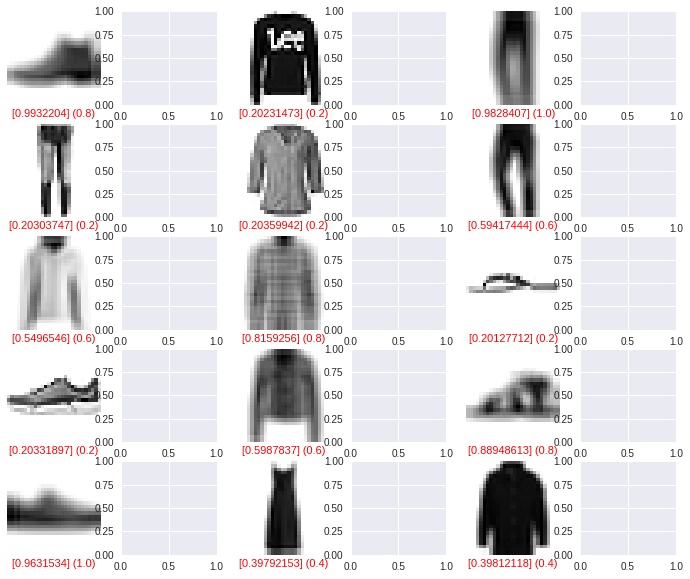

In [12]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  #plot_value_array(i, predictions, test_labels)